# Is the differential heating rate constant across (log) time intervals?

The rate of mass-dependent heating should be constant across log-uniform intervals in time.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from dispersion import select_stars, MC_dispersion, calc_dispersion_and_dispersion_err, sigma_clip, fit_line

plotpar = {'axes.labelsize': 30,
           'font.size': 30,
           'legend.fontsize': 15,
           'xtick.labelsize': 30,
           'ytick.labelsize': 30,
           'text.usetex': True}
plt.rcParams.update(plotpar)

Load the Gaia-McQuillan crossmatch and make cuts.

In [2]:
gaia_mc0 = pd.read_csv("gaia_mc.csv")
print(np.shape(gaia_mc0))

# Cut out visual binaries.
gaia_mc1 = gaia_mc0.iloc[gaia_mc0.flag.values == 1]
print(np.shape(gaia_mc1), "no visual binaries or subgiants")

# Cut out stars with large vb uncertainties.
m = gaia_mc1.vb_err.values < 1.
print(np.shape(gaia_mc1.iloc[m]), "no large vb uncertainties")

m &= gaia_mc1.phot_g_mean_mag.values < 16.
print(np.shape(gaia_mc1.iloc[m]), "no faint stars")

# Cut out rapid rotators (synchronized binaries)
m &= gaia_mc1.age.values > .5
print(np.shape(gaia_mc1.iloc[m]), "no rapid rotators")

# Cut out very hot and very cold stars
m &= (gaia_mc1.color_teffs.values < 5000) * (3500 < gaia_mc1.color_teffs.values)
print(np.shape(gaia_mc1.iloc[m]), "no hot or cold stars")

gaia_mc = gaia_mc1.iloc[m]

(29727, 155)
(10544, 155) no visual binaries or subgiants
(10405, 155) no large vb uncertainties
(10274, 155) no faint stars
(9684, 155) no rapid rotators
(6820, 155) no hot or cold stars


Make cuts in log age and fit a line to the teff - velocity dispersion relation at each age (the TVR). The slope of this line should increase linearly with (log) time.

In [19]:
age_bins = 10**np.linspace(np.log10(.5), np.log10(4.), 9)
mid_age_bins = age_bins[:-1] + .5*np.diff(age_bins)
age_masks = select_stars(gaia_mc, age_bins, "age")

/anaconda3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:180: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


Set up color values.

In [20]:
cmap = plt.cm.get_cmap('viridis_r')
vmin, vmax = np.log10(1e9*min(mid_age_bins)), np.log10(1e9*max(mid_age_bins))
log_agebins = np.log10(age_bins*1e9)
age_midbin = np.diff(log_agebins)*.5 + log_agebins[:-1]
color_values = (age_midbin - vmin)/(vmax - vmin)
rgba = cmap(color_values)

Format data.

In [21]:
x = gaia_mc.color_teffs.values
y = gaia_mc.Prot.values
v = gaia_mc.vb.values
verr = gaia_mc.vb_err.values
xerr = np.ones_like(x)*100
xlim = (5100, 3100)

tbins = np.linspace(min(x), max(x), 10)
ds, derrs = [np.zeros((len(age_bins), len(tbins[:-1]))) for i in range(2)]

In [22]:
def betterstep_scatter(bins, y, c, label, **kwargs):
    new_x = [a for row in zip(bins[:-1], bins[1:]) for a in row]
    new_y = [a for row in zip(y, y) for a in row]
    ax = kwargs.pop("ax", plt.gca())
    ax.plot(new_x, new_y, color=c, lw=2, rasterized=True, label=label)

Make main figure

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

niter =  2 5 stars removed kurtosis =  -0.17300275059537418
niter =  3 4 stars removed kurtosis =  0.056115936035692204
niter =  2 3 stars removed kurtosis =  -0.46169569694819845
niter =  3 3 stars removed kurtosis =  -0.46474791455128983
niter =  2 4 stars removed kurtosis =  -0.0038536244343965187
niter =  3 9 stars removed kurtosis =  0.041595061612692774
niter =  3 13 stars removed kurtosis =  0.2594727714127498
niter =  2 4 stars removed kurtosis =  -0.04952800627107168
niter =  2 5 stars removed kurtosis =  -0.17300275059537418


  7%|▋         | 68/1000 [00:00<00:01, 677.76it/s]

niter =  3 4 stars removed kurtosis =  0.056115936035692204


  7%|▋         | 74/1000 [00:00<00:01, 730.39it/s]

niter =  2 3 stars removed kurtosis =  -0.46169569694819845


  7%|▋         | 71/1000 [00:00<00:01, 705.96it/s]

niter =  3 3 stars removed kurtosis =  -0.46474791455128983


  7%|▋         | 70/1000 [00:00<00:01, 694.59it/s]

niter =  2 4 stars removed kurtosis =  -0.0038536244343965187


  6%|▌         | 56/1000 [00:00<00:01, 556.23it/s]

niter =  3 9 stars removed kurtosis =  0.041595061612692774


  5%|▌         | 52/1000 [00:00<00:01, 513.07it/s]

niter =  3 13 stars removed kurtosis =  0.2594727714127498


  7%|▋         | 69/1000 [00:00<00:01, 688.33it/s]

niter =  2 4 stars removed kurtosis =  -0.04952800627107168


100%|██████████| 1000/1000 [00:01<00:00, 683.90it/s]


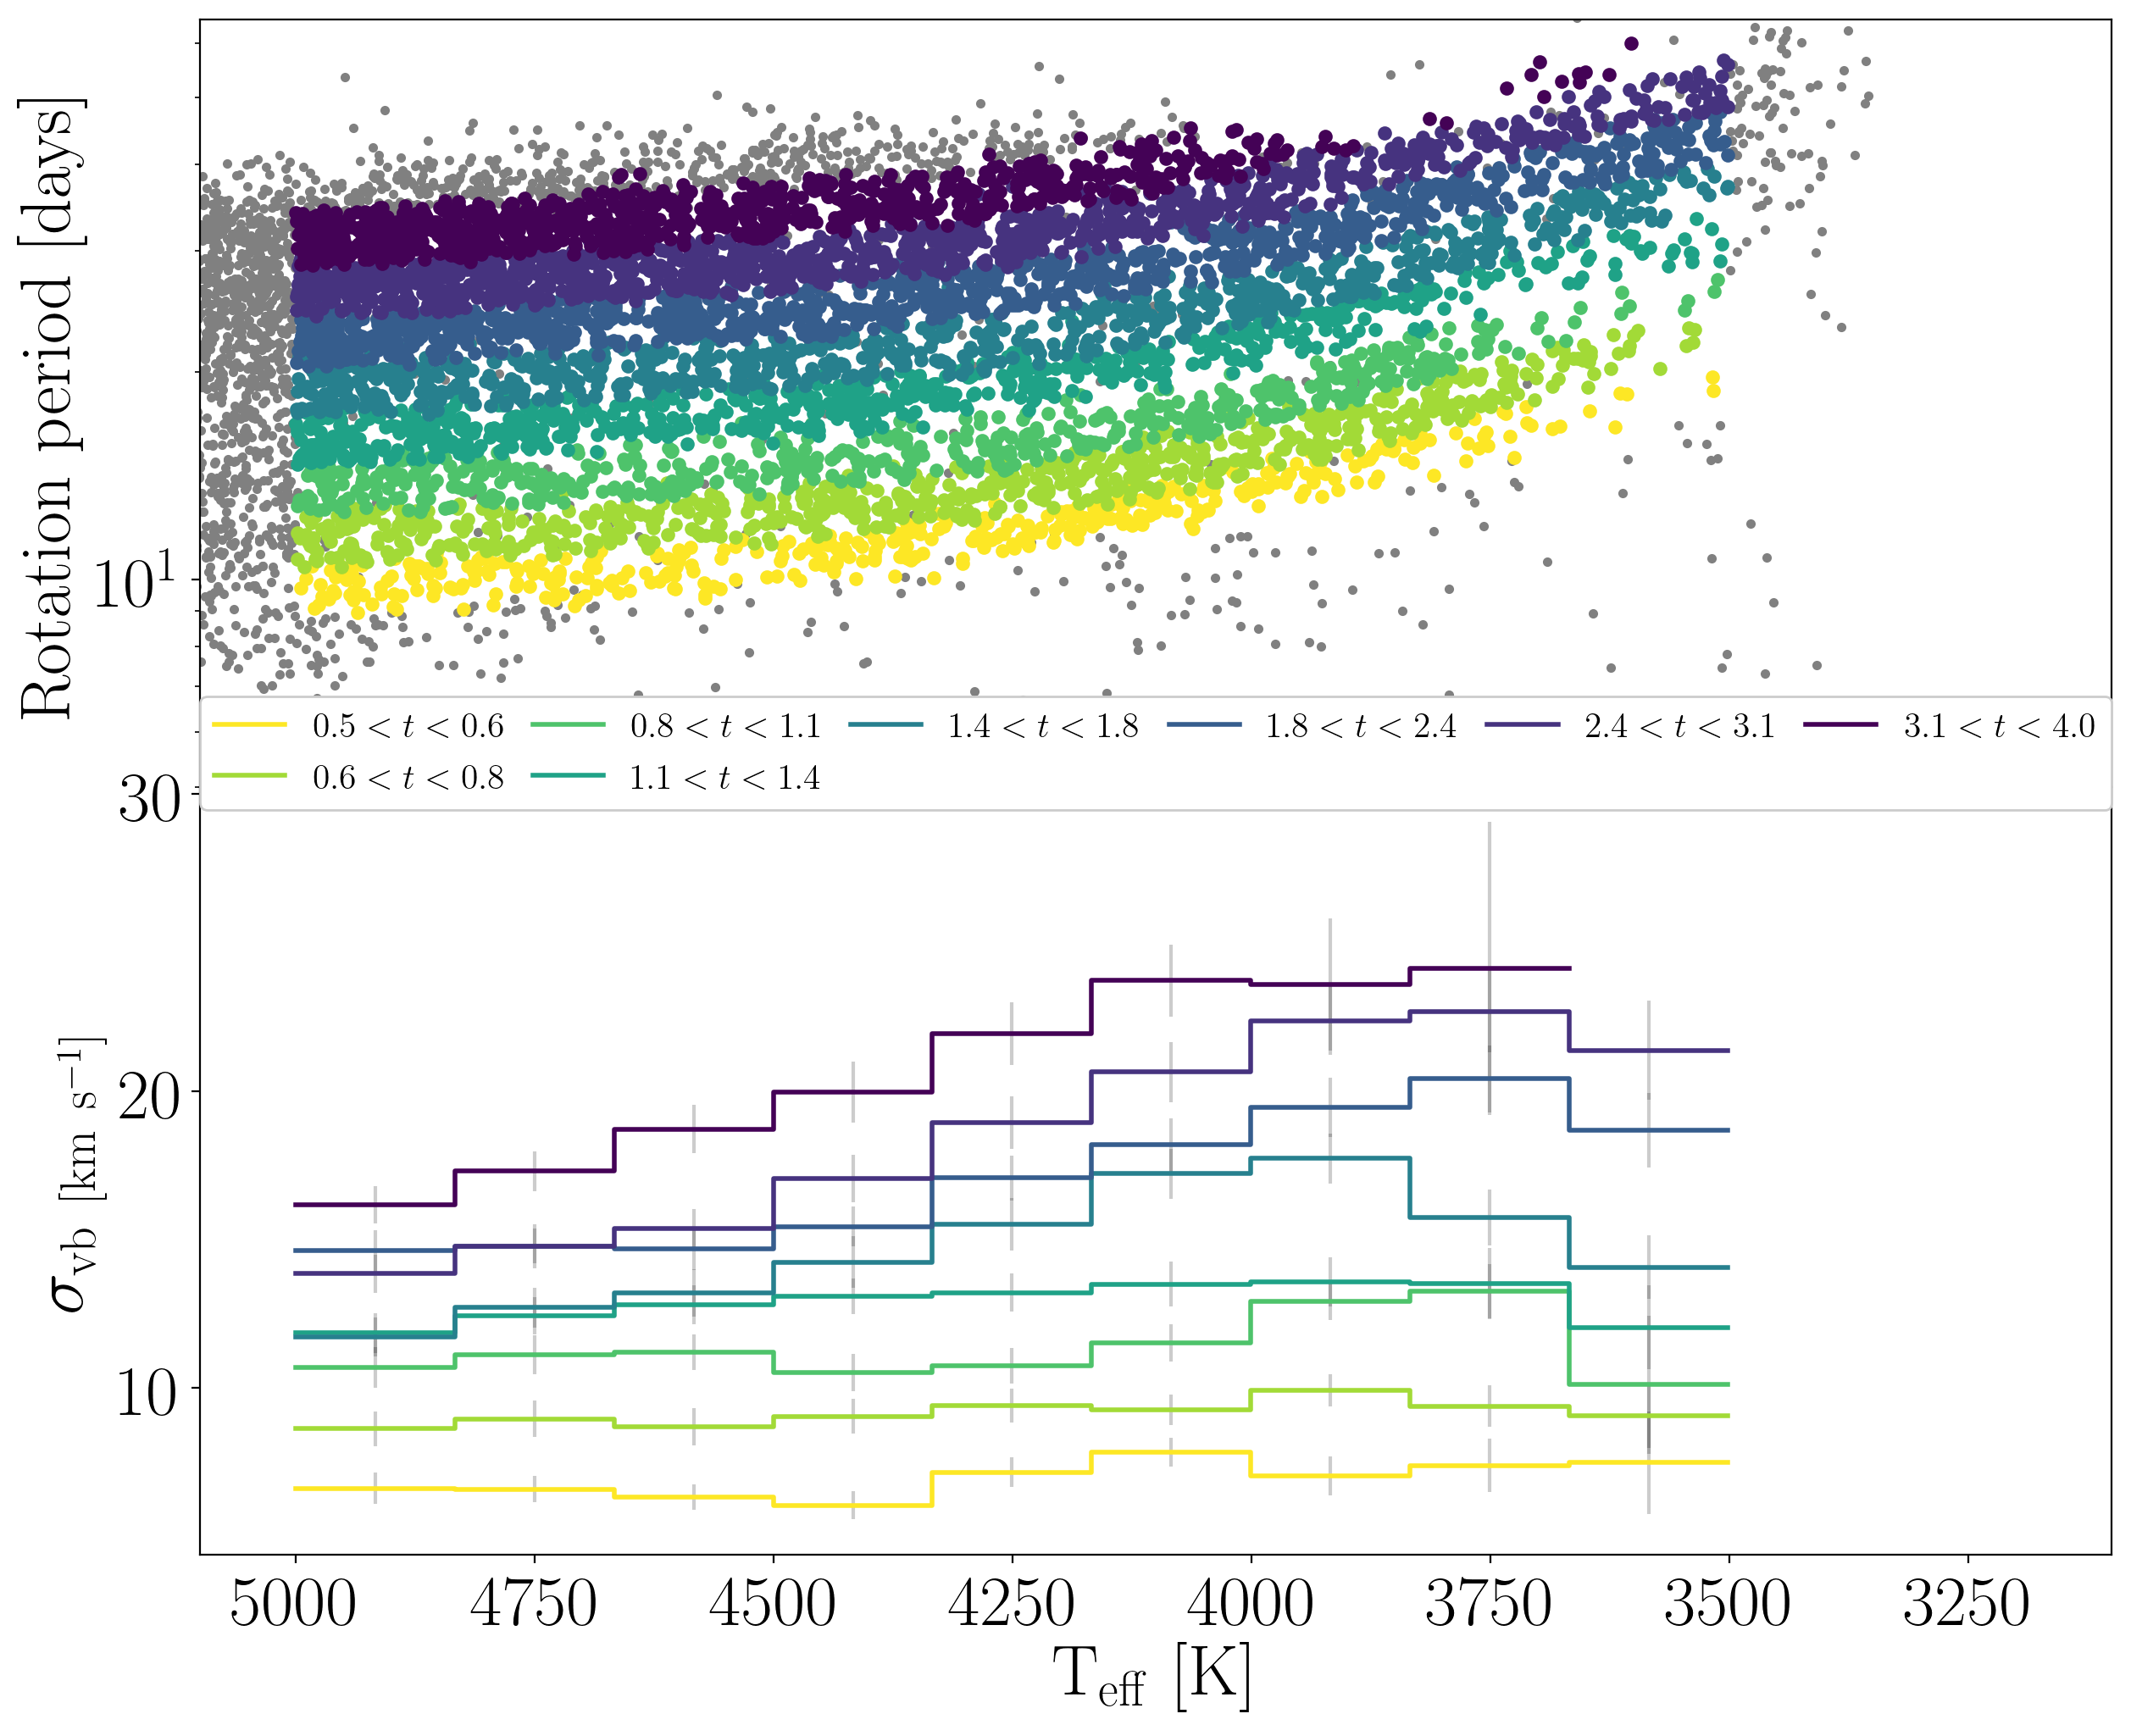

In [23]:
fig = plt.figure(figsize=(16, 12), dpi=200)

ax1 = fig.add_subplot(211)
ax1.plot(gaia_mc1.color_teffs, gaia_mc1.Prot,
         ".", color=".5", rasterized=True, zorder=0)

for i, m in enumerate(age_masks):
    v_clipped, clipping_mask = sigma_clip(v[m], 3)
    cb1 = ax1.scatter(x[m][clipping_mask], y[m][clipping_mask], c=rgba[i],
                      vmin=vmin, vmax=vmax, rasterized=True, zorder=1, s=25,
                      label="${0:.1f} < t < {1:.1f}$".format(age_bins[i], age_bins[i+1]))
    
# Sun
ax1.scatter(5778, 26, facecolors='w', edgecolors="k", s=200, zorder=3, rasterized=True)
ax1.plot(5778, 26, "k.", zorder=3, rasterized=True)
    
ax1.set_ylim(5, 65)
ax1.set_ylabel("$\mathrm{Rotation~period~[days]}$")
ax1.set_yscale("log")
plt.setp(ax1.get_xticklabels(), visible=False)

ax2 = fig.add_subplot(212, sharex=ax1)

for i, m in enumerate(age_masks):
    v_clipped, clipping_mask = sigma_clip(v[m], 3)
    d, derr, k, kerr = MC_dispersion(x[m][clipping_mask], v_clipped, xerr[m][clipping_mask], 
                                     verr[m][clipping_mask],
                                     tbins, 1000, method="std")
    ds[i, :] = d
    derrs[i, :] = derr
    midbin = np.diff(tbins)*.5+tbins[:-1]
    cb2 = betterstep_scatter(tbins, d, rgba[i],
                             label="${0:.1f} < t < {1:.1f}$".format(age_bins[i], age_bins[i+1]))
    ax2.errorbar(midbin, d, yerr=derr, fmt=".", zorder=0, ms=.01, color="k", alpha=.2,
                 rasterized=True)
    
ax2.set_xlabel("$\mathrm{T_{eff}~[K]}$")
ax2.set_ylabel("$\sigma_\mathrm{vb~[km~s^{-1}]}$")
ax2.set_xlim(xlim)
plt.legend(bbox_to_anchor=(0., .97, 1., .102), loc=3, ncol=6, mode="expand", borderaxespad=0., framealpha=.999)

plt.subplots_adjust(hspace=0, right=0.83)

Now fit a line to each of these TVRs. Use the middle value of each bin and only go down to 4000 K.

 15%|█▌        | 151/1000 [00:00<00:01, 726.23it/s]

niter =  2 5 stars removed kurtosis =  -0.17300275059537418


  6%|▌         | 57/1000 [00:00<00:01, 564.28it/s]

niter =  3 4 stars removed kurtosis =  0.056115936035692204


  7%|▋         | 67/1000 [00:00<00:01, 662.60it/s]

niter =  2 3 stars removed kurtosis =  -0.46169569694819845


  4%|▍         | 38/1000 [00:00<00:02, 375.45it/s]

niter =  3 3 stars removed kurtosis =  -0.46474791455128983


  6%|▋         | 63/1000 [00:00<00:01, 623.45it/s]

niter =  2 4 stars removed kurtosis =  -0.0038536244343965187


  6%|▌         | 57/1000 [00:00<00:01, 562.00it/s]

niter =  3 9 stars removed kurtosis =  0.041595061612692774


  6%|▌         | 60/1000 [00:00<00:01, 597.16it/s]

niter =  3 13 stars removed kurtosis =  0.2594727714127498


  5%|▍         | 48/1000 [00:00<00:01, 478.02it/s]

niter =  2 4 stars removed kurtosis =  -0.04952800627107168


100%|██████████| 1000/1000 [00:02<00:00, 495.11it/s]


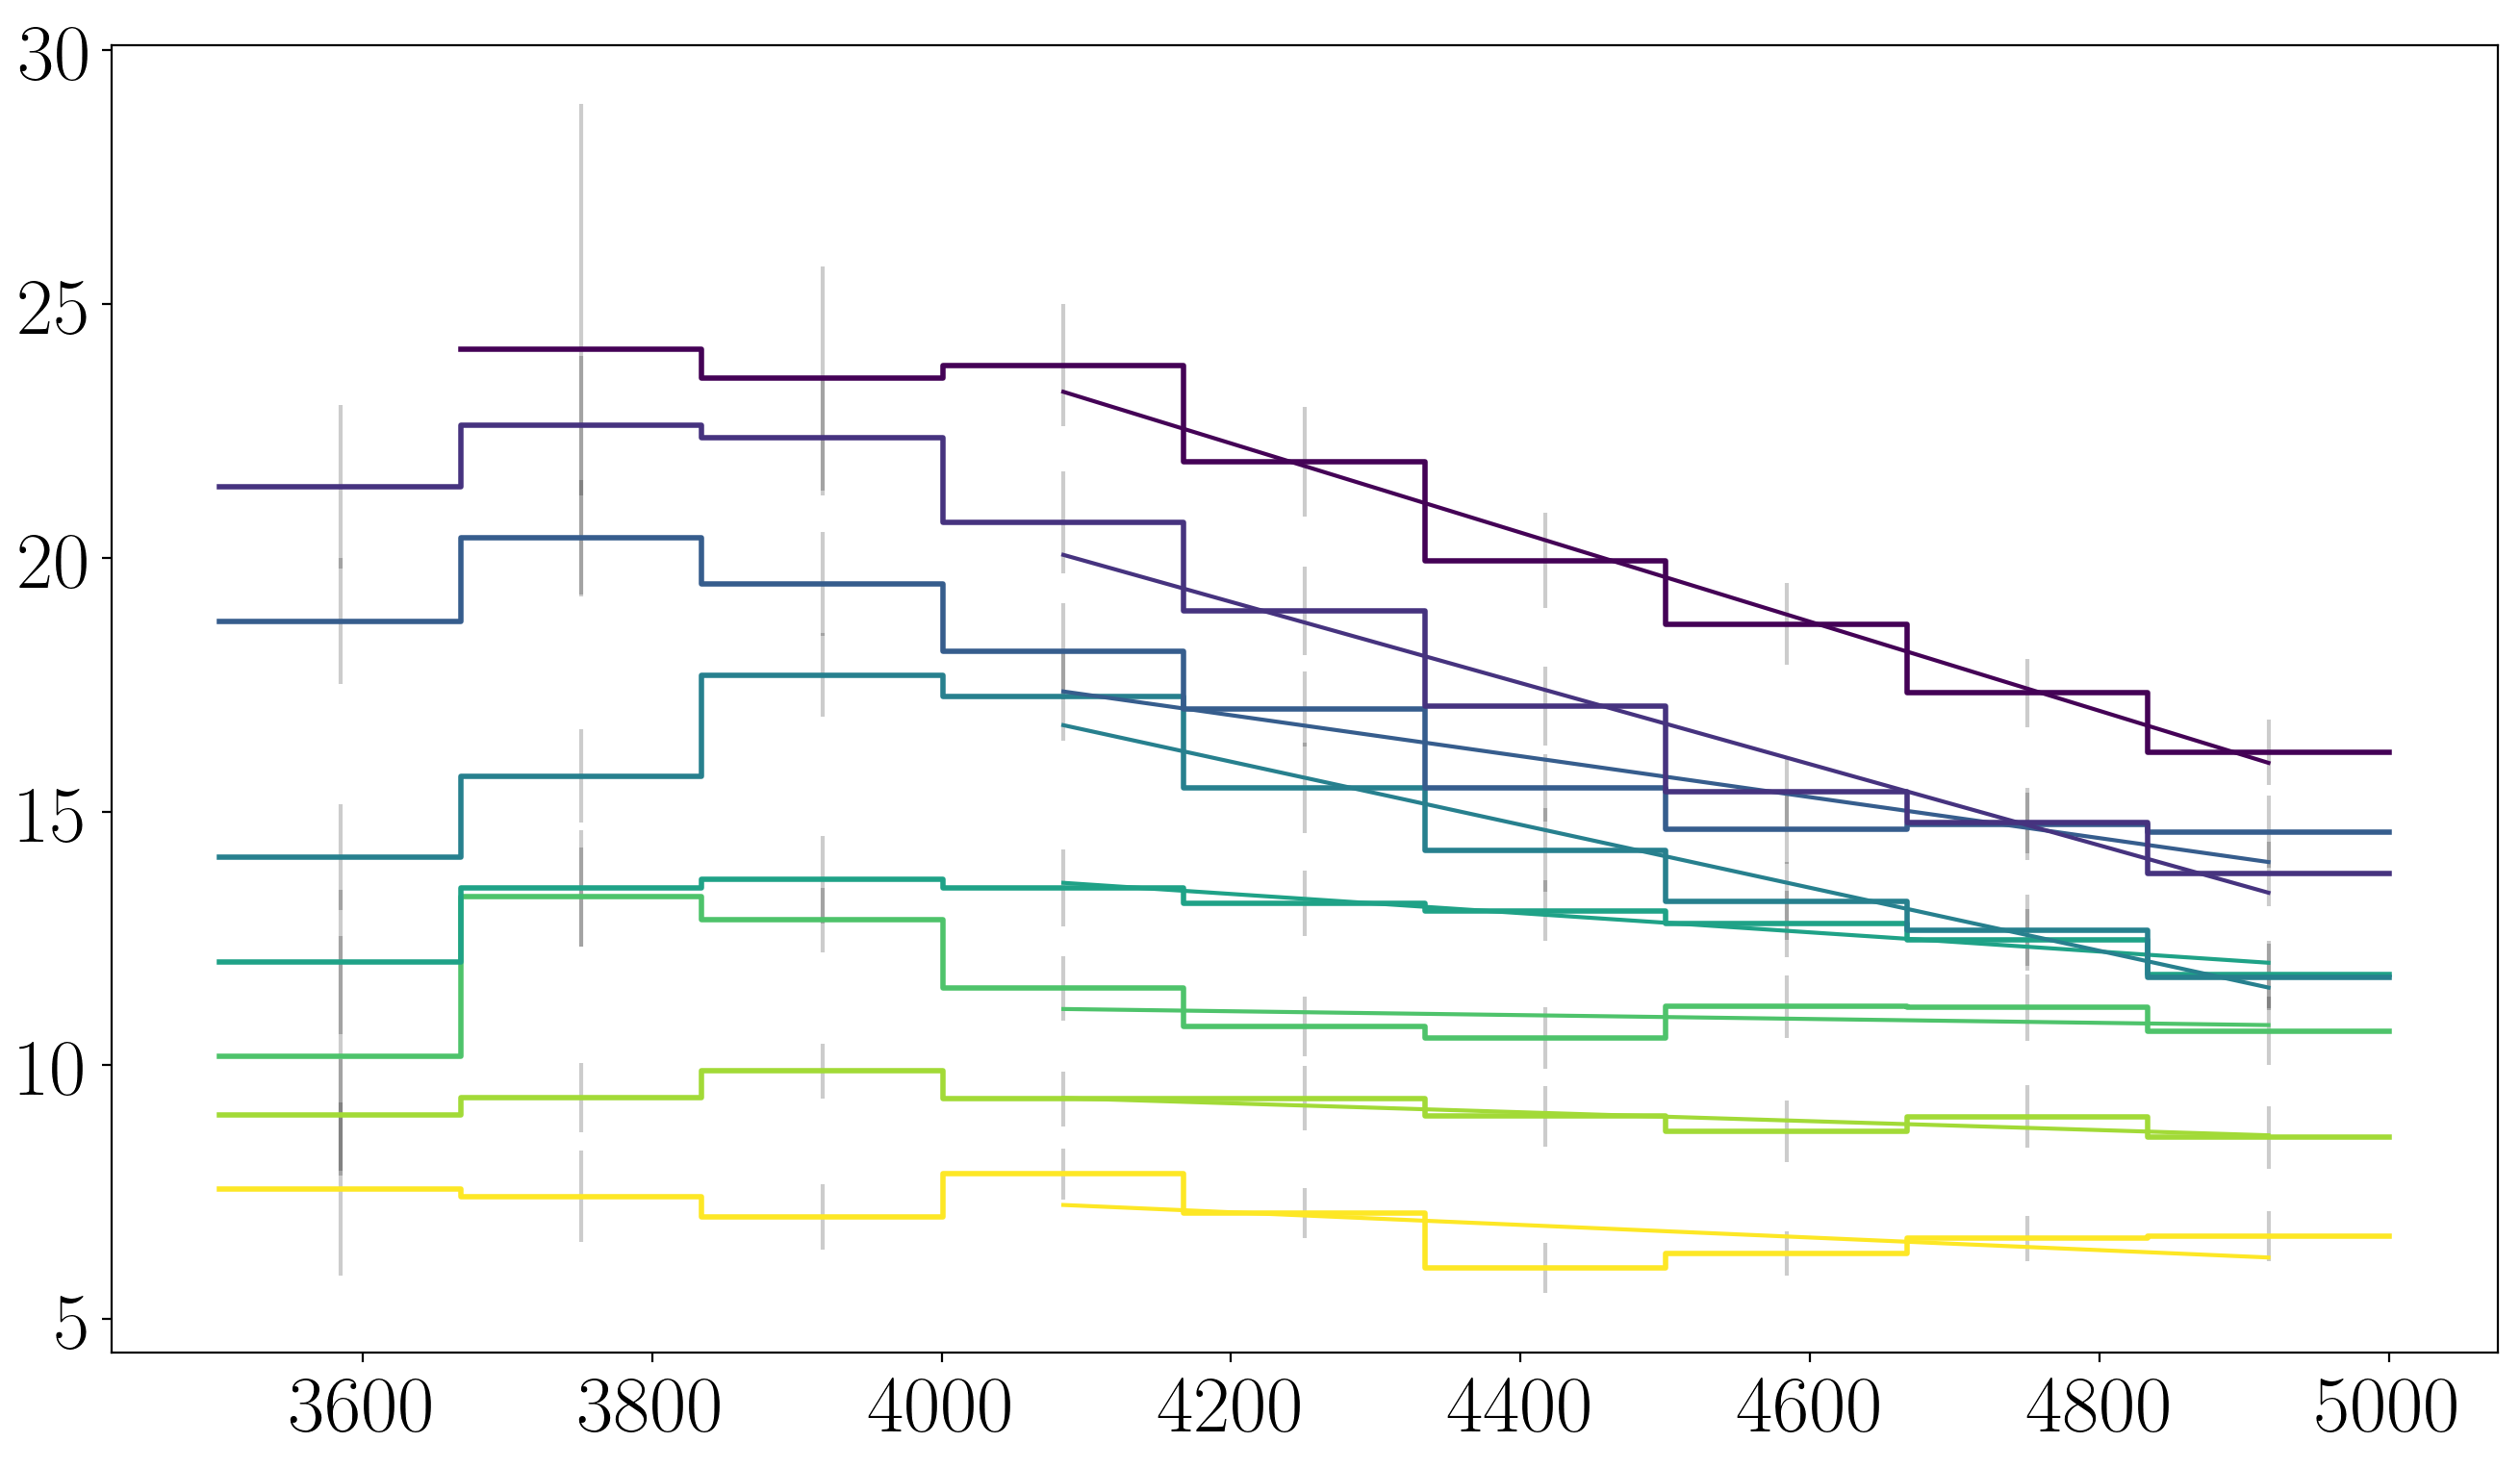

In [24]:
plt.figure(figsize=(16, 9), dpi=200)

w0, w1, w1err = [np.zeros(len(age_masks)) for i in range(3)]
for i, m in enumerate(age_masks):
    v_clipped, clipping_mask = sigma_clip(v[m], 3)
    d, derr, k, kerr = MC_dispersion(x[m][clipping_mask], v_clipped, xerr[m][clipping_mask], 
                                     verr[m][clipping_mask],
                                     tbins, 1000, method="std")
    ds[i, :] = d
    derrs[i, :] = derr
    midbin = np.diff(tbins)*.5+tbins[:-1]
    cb2 = betterstep_scatter(tbins, d, rgba[i],
                             label="${0:.1f} < t < {1:.1f}$".format(age_bins[i], age_bins[i+1]))
    plt.errorbar(midbin, d, yerr=derr, fmt=".", zorder=0, ms=.01, color="k", alpha=.2,
                 rasterized=True)
    
    # Fit a line
    w, werr = fit_line(midbin[3:], d[3:], derr[3:])
    plt.plot(midbin[3:], w[0] + midbin[3:]*w[1], color=rgba[i])
    w1[i] = w[1]
    w1err[i] = np.sqrt(werr[1, 1])

-0.014821144202411122 0.005950110202617623


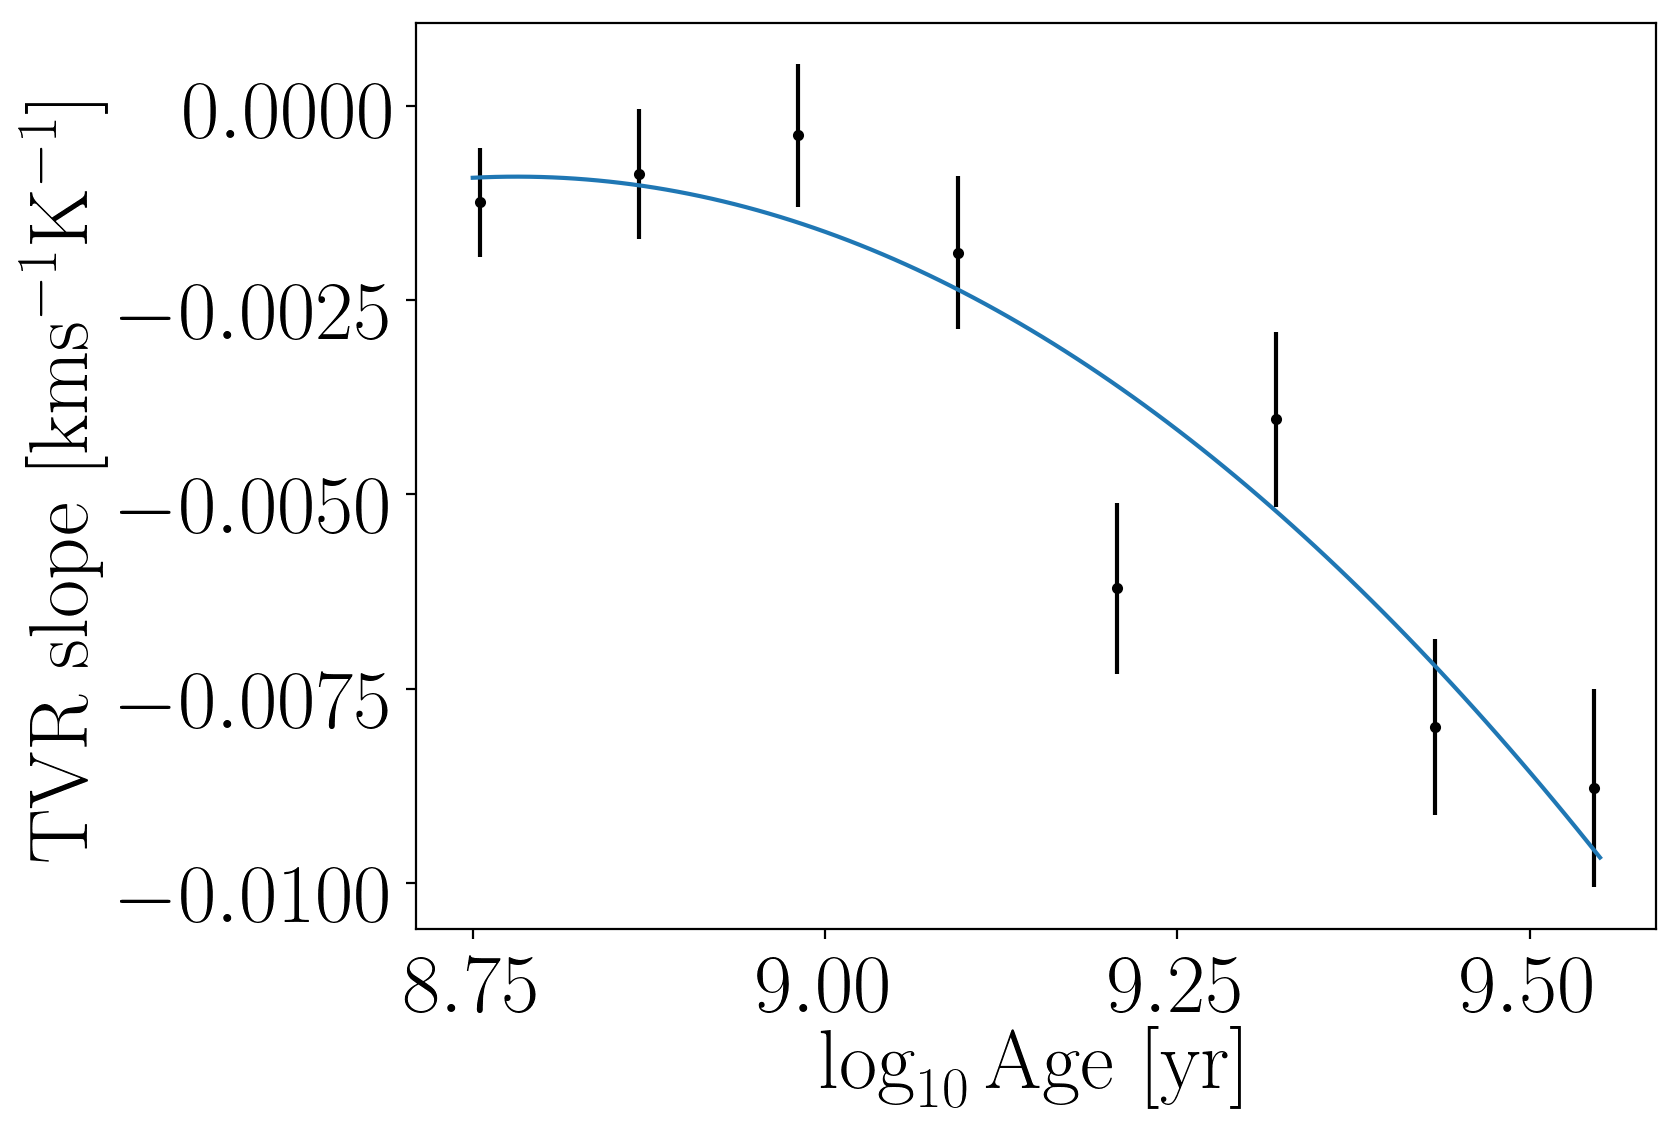

In [25]:
plt.figure(figsize=(8, 6), dpi=200)
plt.errorbar(age_midbin, w1, yerr=w1err, fmt="k.", zorder=1)
mc, err = fit_line(age_midbin[2:], w1[2:], w1err[2:])
c, m = mc
xs = np.linspace(8.75, 9.55, 100)
# plt.plot(xs, m*xs + c, zorder=0, color=".7")

from dispersion import fit_cubic

p, pvar = fit_cubic(age_midbin, w1, w1err)
plt.plot(xs, np.polyval(p[::-1], xs))
plt.xlabel("$\log_{10}\mathrm{Age~[yr]}$")
plt.ylabel("$\mathrm{TVR~slope~[kms^{-1}K^{-1}]}$");
print(p[2], np.sqrt(pvar[2, 2]))

array([ 0.20068966, 14.91359357])

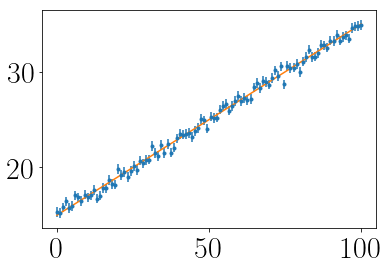

In [138]:
w_true = [15, .2]

n = 100
x = np.linspace(0, 100, n)

err = .5
yerr = np.ones_like(x)*err
np.random.seed(42)
y = w_true[0] + w_true[1]*x + np.random.randn(n)*err
plt.errorbar(x, y, yerr=yerr, fmt=".")
p = np.polyfit(x, y, 1)
plt.plot(x, np.polyval(p, x))
p

In [114]:
print((10**age_midbin)*1e-9)

[0.56939432 0.73841307 0.95760328 1.24185781 1.61049033 2.08854756
 2.70851109 3.51250432]


heating doesn't begin in earnest until after around 1.5 Gyr (not far from the age of NGC 6811). However, after around 1.5 Gyr, differential heating rate is consistent with a straight line. Heating is occurring -- it's just differential heating that takes off after 1.5 gyr.

This suggests that the period-color relation changes after 1.5 Gyr, OR that different heating processes occur in before and after 1.5 Gyr. Some less mass-dependent heating process (like GMCs) could heat in the first billion years, then stellar close encounters could take over. Although, you would expect these two process to have a different heating rate overall, no?